# Solution 3 1/3

1. Download the mushroom dataset here: https://archive.ics.uci.edu/ml/datasets/Mushroom
2. Create a new Jupyter notebook
3. Load the dataset from CSV into pandas


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

shroom_data = pd.read_csv("agaricus-lepiota.data", header=None)
df = pd.DataFrame(shroom_data)
df.columns = ['edible','cap-shape','cap-surface','cap-color','bruises?','odor','gill-attachment','gitt-spacing',
              'gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring',
              'stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type',
              'veil-color','ring-number','ring-type','spore-print-color','population','habitat']
df.describe()

,edible,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gitt-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


4. Explore the distributions in the data. For example, how is habitat distributed between edibility vs non-edibility?


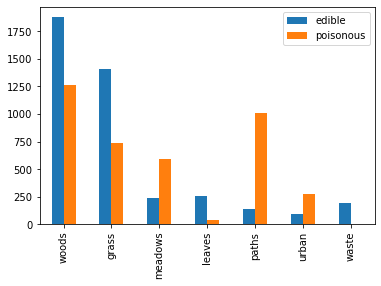

In [13]:
df2 = pd.DataFrame(df.loc[:, ['edible', 'habitat']])

df_e = df2[:][df2['edible']=='e']
df_p = df2[:][df2['edible']=='p']


x = df_e.sum(axis=0)[1]
s = pd.Series(list(x))
e_count=s.value_counts().to_frame()

x = df_p.sum(axis=0)[1]
s = pd.Series(list(x))
p_count=s.value_counts().to_frame()


df_ep=pd.merge(e_count, p_count, left_index=True, right_index=True, how='outer')
df_ep.columns=['edible','poisonous']
df_ep.index=['woods', 'grass', 'meadows', 'leaves', 'paths', 'urban', 'waste']
df_ep.plot.bar()

5. The data is entirely categorical. Convert each feature to dummy variables.


In [20]:
df = pd.get_dummies(df)
df

,edible_e,edible_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


6. Visualise the feature space using a similar method to the one we used for the 20 newgroups dataset.

In [15]:
shroom_data.columns

Index(['edible', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor',
       'gill-attachment', 'gitt-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer = TfidfVectorizer()
#vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(shroom_data)
vectors.shape

(23, 24)

In [17]:
# How sparse is the document-term matrix? (%)
vectors.nnz / float(vectors.shape[0]*vectors.shape[1]) * 100.0

9.057971014492754

Index(['bruises?', 'cap-color', 'cap-shape', 'cap-surface', 'edible',
       'gill-attachment', 'gill-color', 'gill-size', 'gitt-spacing', 'habitat',
       'odor', 'population', 'ring-number', 'ring-type', 'spore-print-color',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'stalk-root',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'veil-color', 'veil-type'],
      dtype='object')
color    5
dtype: int64


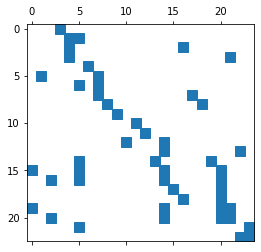

In [18]:
import matplotlib.pyplot as plt
import numpy as np

indices = np.argsort(df.columns)
print(shroom_data.columns[indices])

freqs = vectors[indices].sum(axis=0)
i = np.argsort(freqs)
vocab = pd.Series(vectorizer.vocabulary_)
print(vocab[vocab.values==i[...,-1].item()])

plt.spy(vectors[indices])
fig = plt.gcf()
plt.plot()
plt.show()